# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [70]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [71]:
boston = load_boston()

data = boston["data"]
target = boston["target"]

Создайте датафреймы X и y из этих данных.

In [102]:
X = pd.DataFrame(data, columns=boston["feature_names"])
y = pd.DataFrame(target, columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [74]:
std_scaler = StandardScaler()

In [132]:
X_train_std_scaled = pd.DataFrame(std_scaler.fit_transform(X_train), columns = X_train.columns)
X_test_std_scaled = pd.DataFrame(std_scaler.transform(X_test), columns = X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [89]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_std_scaled)

Постройте диаграмму рассеяния на этих данных.

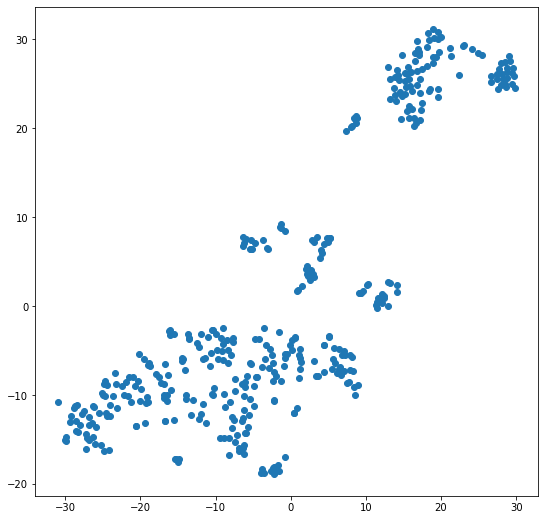

In [92]:
from pylab import rcParams
rcParams["figure.figsize"] = 9, 9

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [79]:
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [105]:
labels_train = km.fit_predict(X_train_std_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

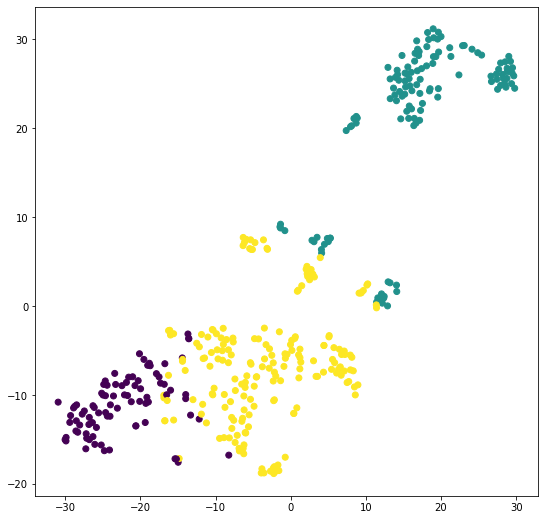

In [106]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [141]:
X_train_mc1 = X_train.loc[labels_train == 0, 'CRIM'].mean()
X_train_mc2 = X_train.loc[labels_train == 1, 'CRIM'].mean()
X_train_mc3 = X_train.loc[labels_train == 2, 'CRIM'].mean()

print(f'В кластере 1 среднее значение параметра CRIM = {X_train_mc1}')
print(f'В кластере 2 среднее значение параметра CRIM = {X_train_mc2}')
print(f'В кластере 3 среднее значение параметра CRIM = {X_train_mc3}')

В кластере 1 среднее значение параметра CRIM = 0.07356558139534886
В кластере 2 среднее значение параметра CRIM = 10.797028425196853
В кластере 3 среднее значение параметра CRIM = 0.42166020942408367


In [128]:
y_train_mc1 = y_train.loc[labels_train == 0, 'price'].mean()
y_train_mc2 = y_train.loc[labels_train == 1, 'price'].mean()
y_train_mc3 = y_train.loc[labels_train == 2, 'price'].mean()

print(f'В кластере 1 среднее значение параметра price = {y_train_mc1}')
print(f'В кластере 2 среднее значение параметра price = {y_train_mc2}')
print(f'В кластере 3 среднее значение параметра price = {y_train_mc3}')

В кластере 1 среднее значение параметра price = 27.788372093023252
В кластере 2 среднее значение параметра price = 16.165354330708666
В кластере 3 среднее значение параметра price = 24.958115183246072


# Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [139]:
labels_test = km.predict(X_test_std_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [140]:
X_test_mc1 = X_test.loc[labels_test == 0, 'CRIM'].mean()
X_test_mc2 = X_test.loc[labels_test == 1, 'CRIM'].mean()
X_test_mc3 = X_test.loc[labels_test == 2, 'CRIM'].mean()

print(f'В кластере 1 среднее значение параметра CRIM = {X_test_mc1}')
print(f'В кластере 2 среднее значение параметра CRIM = {X_test_mc2}')
print(f'В кластере 3 среднее значение параметра CRIM = {X_test_mc3}')

В кластере 1 среднее значение параметра CRIM = 0.062060000000000004
В кластере 2 среднее значение параметра CRIM = 10.165531142857143
В кластере 3 среднее значение параметра CRIM = 0.26607882352941176


In [143]:
y_test_mc1 = y_test.loc[labels_test == 0, 'price'].mean()
y_test_mc2 = y_test.loc[labels_test == 1, 'price'].mean()
y_test_mc3 = y_test.loc[labels_test == 2, 'price'].mean()

print(f'В кластере 1 среднее значение параметра price = {y_test_mc1}')
print(f'В кластере 2 среднее значение параметра price = {y_test_mc2}')
print(f'В кластере 3 среднее значение параметра price = {y_test_mc3}')

В кластере 1 среднее значение параметра price = 31.35
В кластере 2 среднее значение параметра price = 16.437142857142856
В кластере 3 среднее значение параметра price = 21.860784313725492
